In [3]:
import numpy as np
import matplotlib.pyplot as plt
import simim.siminterface as sim

tng100 = sim.SimHandler('TNG100-1')

rng = np.random.default_rng(1511)

In [4]:
from simim import constants as sc
from simim.galprops import prop_behroozi_sfr, prop_delooze_cii
from simim.galprops import Prop
from astropy.cosmology import Planck18 as cosmo
from astropy import units as u, constants as con


tng100.make_property(prop_behroozi_sfr, other_kws={'rng': rng}, overwrite=True, rename='sfr_behroozi', write=True)
tng100.make_property(prop_delooze_cii, other_kws={'rng': rng}, overwrite=True, rename='LCII', kw_remap={'sfr': 'sfr_behroozi'}, write=True)


def mass_HI(mass, redshift):
    if type(mass) == np.ndarray and mass.dtype != np.float64:
        mass = mass.astype(np.float64)
    z = redshift
    alp, beta = 0.09, -0.5 # dimensionless
    Om, Ob, h = cosmo.Om(z), cosmo.Ob(z), cosmo.h
    vc0 = 10 ** 1.56 * u.km / u.s
    Y_He = 0.24
    fHc = (1.0 - Y_He) * Ob / Om
    Delta_v = 18 * np.pi ** 2 + 82 * (Om - 1) - 39 * (Om - 1) ** 2 # dimensionless
    RvM = 46.1 * (Delta_v * Om * h ** 2 / 24.4) ** (-1/3) * ((1+z) / 3.3) ** -1 \
            * (mass / 1e11) ** (1/3) * u.kpc
    vcM = np.sqrt(con.G * mass * con.M_sun / RvM).to(u.km / u.s)
    vterm = np.exp(-1.0 * (vc0 / vcM) ** 3)
    massHI = alp * fHc * (mass / 1e11 / h) ** beta * vterm * mass
    return massHI


def I_HI(mass_HI, redshift):
    mass_HI = mass_HI * u.M_sun
    z = redshift
    A10 = 2.869e-15 / u.s
    dl = cosmo.luminosity_distance(z).to(u.cm) * (1 + z)
    I_HI = 3 * con.h * con.c / (21 * u.cm) * A10 * mass_HI / (4 * np.pi * dl ** 2) / con.u / u.sr / u.Hz
    return I_HI.to(u.Jy / u.sr).value

prop_mass_HI = Prop(prop_name='mass_HI',
                 prop_function=mass_HI,
                 kwargs=['mass', 'redshift'],
                 units="Msun")

prop_I_HI = Prop(prop_name='I_HI',
                 prop_function=I_HI,
                 kwargs=['mass_HI', 'redshift'],
                 units="Jy/sr")

tng100.make_property(prop_mass_HI, overwrite=True, write=True)
tng100.make_property(prop_I_HI, overwrite=True, write=True)

/Users/shubh/Library/CloudStorage/OneDrive-PennO365/TIM/crossLIM/simim_public/simim/_handlers.py:296: UserWarning: Property sfr_behroozi already exists, overwriting
  warnings.warn("Property {} already exists, overwriting".format(name))
/Users/shubh/Library/CloudStorage/OneDrive-PennO365/TIM/crossLIM/simim_public/simim/siminterface/simhandler.py:582: UserWarning: Property sfr_behroozi already exists, overwriting
  warnings.warn("Property {} already exists, overwriting".format(name))
/Users/shubh/Library/CloudStorage/OneDrive-PennO365/TIM/crossLIM/simim_public/simim/_handlers.py:350: UserWarning: Property sfr_behroozi already exists, overwriting
  warnings.warn("Property {} already exists, overwriting".format(property_name))


Assigning props for Snapshot 67.  


/Users/shubh/Library/CloudStorage/OneDrive-PennO365/TIM/crossLIM/simim_public/simim/_handlers.py:296: UserWarning: Property LCII already exists, overwriting
  warnings.warn("Property {} already exists, overwriting".format(name))
/Users/shubh/Library/CloudStorage/OneDrive-PennO365/TIM/crossLIM/simim_public/simim/siminterface/simhandler.py:582: UserWarning: Property LCII already exists, overwriting
  warnings.warn("Property {} already exists, overwriting".format(name))
/Users/shubh/Library/CloudStorage/OneDrive-PennO365/TIM/crossLIM/simim_public/simim/_handlers.py:350: UserWarning: Property LCII already exists, overwriting
  warnings.warn("Property {} already exists, overwriting".format(property_name))


Assigning props for Snapshot 67.  


/Users/shubh/Library/CloudStorage/OneDrive-PennO365/TIM/crossLIM/simim_public/simim/_handlers.py:296: UserWarning: Property mass_HI already exists, overwriting
  warnings.warn("Property {} already exists, overwriting".format(name))
/Users/shubh/Library/CloudStorage/OneDrive-PennO365/TIM/crossLIM/simim_public/simim/siminterface/simhandler.py:582: UserWarning: Property mass_HI already exists, overwriting
  warnings.warn("Property {} already exists, overwriting".format(name))
/Users/shubh/Library/CloudStorage/OneDrive-PennO365/TIM/crossLIM/simim_public/simim/_handlers.py:350: UserWarning: Property mass_HI already exists, overwriting
  warnings.warn("Property {} already exists, overwriting".format(property_name))


Assigning props for Snapshot 67.  


/Users/shubh/Library/CloudStorage/OneDrive-PennO365/TIM/crossLIM/simim_public/simim/_handlers.py:296: UserWarning: Property I_HI already exists, overwriting
  warnings.warn("Property {} already exists, overwriting".format(name))
/Users/shubh/Library/CloudStorage/OneDrive-PennO365/TIM/crossLIM/simim_public/simim/siminterface/simhandler.py:582: UserWarning: Property I_HI already exists, overwriting
  warnings.warn("Property {} already exists, overwriting".format(name))
/Users/shubh/Library/CloudStorage/OneDrive-PennO365/TIM/crossLIM/simim_public/simim/_handlers.py:350: UserWarning: Property I_HI already exists, overwriting
  warnings.warn("Property {} already exists, overwriting".format(property_name))


Assigning props for Snapshot 67.  


In [5]:
def rho_x(z, A, B, C, D):
    return (A * (1 + z) ** B) / (1 + ((1 + z) / C) ** D)

def rho_HI(z, A, B, C):
    return A * np.tanh(1 + z - B) + C

# Redshift range
z = np.linspace(0.1, 5, 100)

# Parameters from the table
params_rho_H2 = (1.00e7, 3.0, 2.3, 5.1)
uncert_rho_H2 = (0.14e7, 0.6, 0.3, 0.5)

params_rho_stars = (1.3e10, -4.1, 2.5, -3.8)
uncert_rho_stars = (1.0e10, 0.4, 0.4, 0.3)

params_psi_stars = (0.0158, 2.88, 2.75, 5.88)
uncert_psi_stars = (0.0010, 0.16, 0.11, 0.15)

params_rho_HI = (4.5e7, 2.8, 1.01e8)
uncert_rho_HI = (0.5e7, 0.4, 0.07e8)

# Compute densities
rho_H2_vals = rho_x(z, *params_rho_H2)
rho_stars_vals = rho_x(z, *params_rho_stars)
psi_stars_vals = rho_x(z, *params_psi_stars)
rho_HI_vals = rho_HI(z, *params_rho_HI)

# Compute upper and lower bounds for uncertainties
rho_H2_upper = rho_x(z, *(np.array(params_rho_H2) + np.array(uncert_rho_H2)))
rho_H2_lower = rho_x(z, *(np.array(params_rho_H2) - np.array(uncert_rho_H2)))

rho_stars_upper = rho_x(z, *(np.array(params_rho_stars) + np.array(uncert_rho_stars)))
rho_stars_lower = rho_x(z, *(np.array(params_rho_stars) - np.array(uncert_rho_stars)))

psi_stars_upper = rho_x(z, *(np.array(params_psi_stars) + np.array(uncert_psi_stars)))
psi_stars_lower = rho_x(z, *(np.array(params_psi_stars) - np.array(uncert_psi_stars)))

rho_HI_upper = rho_HI(z, *(np.array(params_rho_HI) + np.array(uncert_rho_HI)))
rho_HI_lower = rho_HI(z, *(np.array(params_rho_HI) - np.array(uncert_rho_HI)))

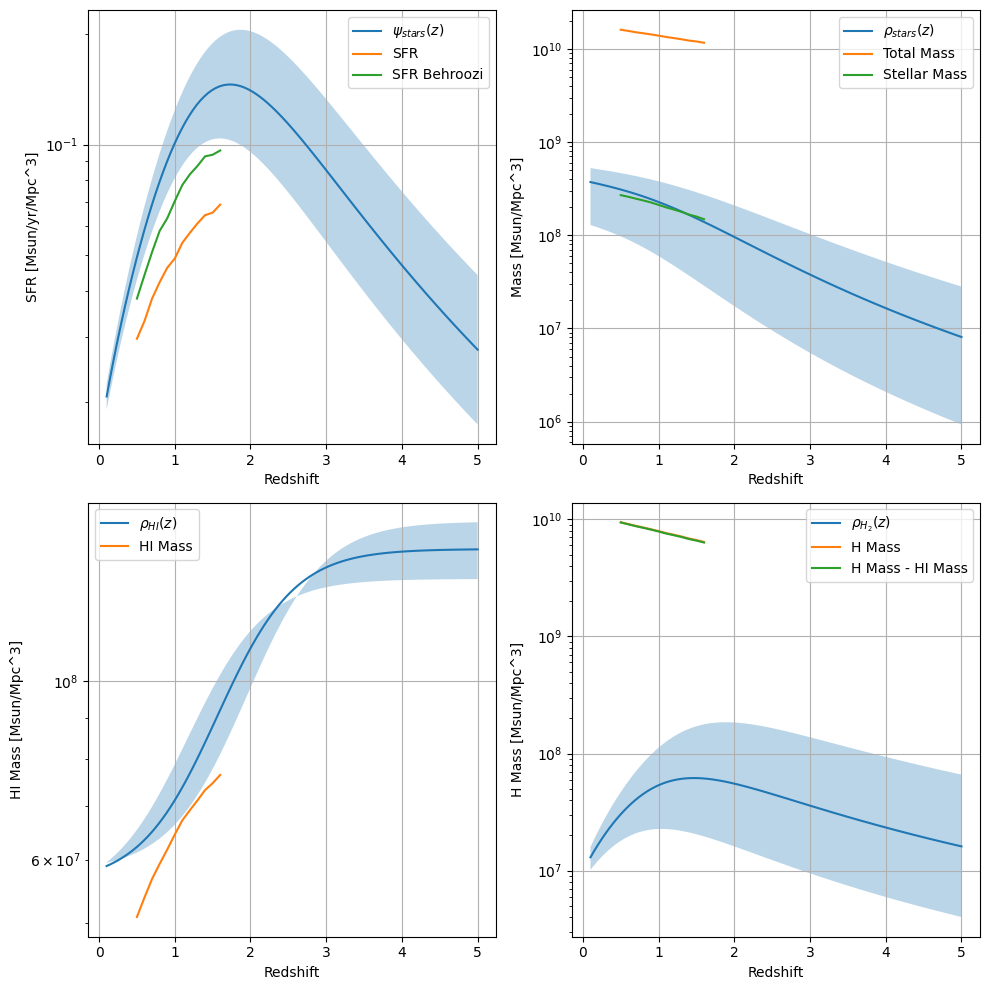

In [9]:
zvals = np.arange(0.5, 1.7, 0.1)
tng100snaps = [tng100.get_snap_from_z(z) for z in zvals]

sfrs = [np.nansum(snap.return_property('sfr')) / snap.box_edge ** 3 for snap in tng100snaps]
sfrs_bh = [np.nansum(snap.return_property('sfr_behroozi')) / snap.box_edge ** 3 for snap in tng100snaps]
masses = [np.nansum(snap.return_property('mass')) / snap.box_edge ** 3 for snap in tng100snaps]
m_stellars = [np.nansum(snap.return_property('m_stars_wind')) / snap.box_edge ** 3 for snap in tng100snaps]
mass_HIs = [np.nansum(snap.return_property('mass_HI')) / snap.box_edge ** 3 for snap in tng100snaps]
mass_H = [np.nansum(snap.return_property('metH') * snap.return_property('mass')) / snap.box_edge ** 3 for snap in tng100snaps]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

ax1.plot(z, psi_stars_vals, label=r'$\psi_{stars}(z)$')
ax1.fill_between(z, psi_stars_lower, psi_stars_upper, alpha=0.3)
ax1.plot(zvals, sfrs, label='SFR')
ax1.plot(zvals, sfrs_bh, label='SFR Behroozi')
ax1.set_ylabel('SFR [Msun/yr/Mpc^3]')

ax2.plot(z, rho_stars_vals, label=r'$\rho_{stars}(z)$')
ax2.fill_between(z, rho_stars_lower, rho_stars_upper, alpha=0.3)
ax2.plot(zvals, masses, label='Total Mass')
ax2.plot(zvals, m_stellars, label='Stellar Mass')
ax2.set_ylabel('Mass [Msun/Mpc^3]')

ax3.plot(z, rho_HI_vals, label=r'$\rho_{HI}(z)$')
ax3.fill_between(z, rho_HI_lower, rho_HI_upper, alpha=0.3)
ax3.plot(zvals, mass_HIs, label='HI Mass')
ax3.set_ylabel('HI Mass [Msun/Mpc^3]')

ax4.plot(z, rho_H2_vals, label=r'$\rho_{H_2}(z)$')
ax4.fill_between(z, rho_H2_lower, rho_H2_upper, alpha=0.3)
ax4.plot(zvals, mass_H, label='H Mass')
ax4.plot(zvals, np.array(mass_H) - np.array(mass_HIs), label='H Mass - HI Mass')
ax4.set_ylabel('H Mass [Msun/Mpc^3]')

for ax in [ax1, ax2, ax3, ax4]:
    ax.legend()
    ax.grid()
    ax.set_xlabel('Redshift')
    ax.set_yscale('log')
plt.tight_layout()
plt.show()
plt.close()

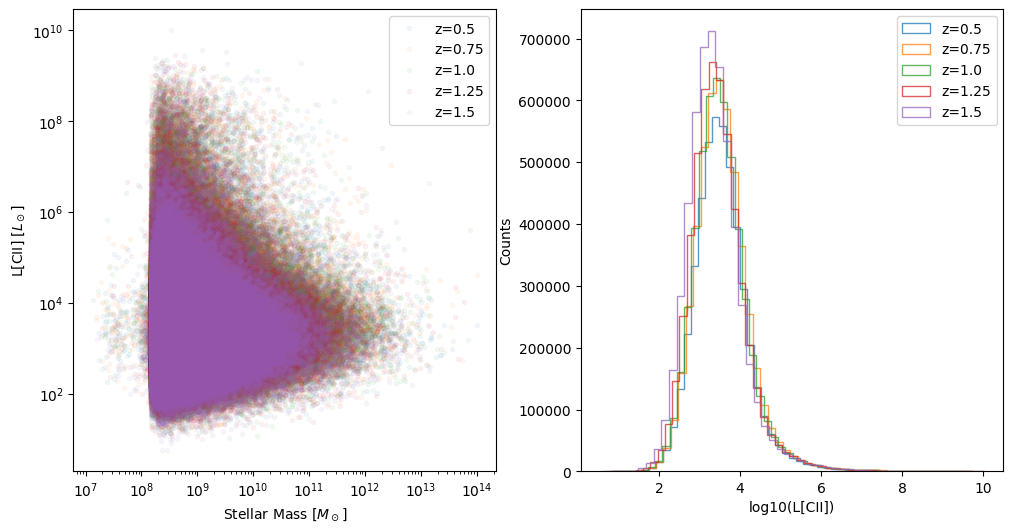

In [ ]:
zvals = [0.5, 0.75, 1.0, 1.25, 1.5]
tng100snaps = [tng100.get_snap_from_z(z) for z in zvals]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for z, snap in zip(zvals, tng100snaps):
    masses = snap.return_property('mass')
    LCIIs = snap.return_property('LCII')
    ax1.plot(np.random.choice(masses, len(masses) // 10), np.random.choice(LCIIs, len(LCIIs) // 10), \
        '.', label=f'z={z}', alpha=0.05)
    ax2.hist(np.log10(LCIIs), bins=50, histtype='step', label=f'z={z}', alpha=0.75)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Stellar Mass [$M_\odot$]')
ax1.set_ylabel('L[CII] [$L_\odot$]')
ax1.legend()
ax2.set_xlabel('log10(L[CII])')
ax2.set_ylabel('Counts')
ax2.legend()
plt.show()
plt.close()

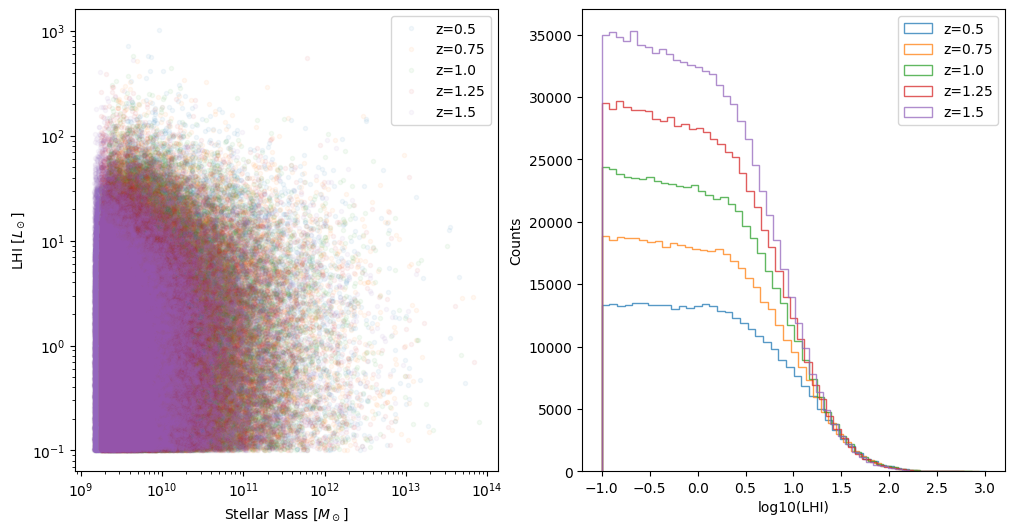

In [ ]:
zvals = [0.5, 0.75, 1.0, 1.25, 1.5]
tng100snaps = [tng100.get_snap_from_z(z) for z in zvals]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for z, snap in zip(zvals, tng100snaps):
    masses = snap.return_property('mass')
    I_HIs = snap.return_property('I_HI') * u.Jy / u.sr
    LHIs = I_HIs * 4 * np.pi * cosmo.luminosity_distance(z).to(u.m) ** 2 * (1 + z) ** 2 * u.Hz * u.sr
    LHIs = LHIs.to(u.L_sun).value
    low_limit = 1e-1
    masses = masses[LHIs > low_limit]
    LHIs = LHIs[LHIs > low_limit]
    ax1.plot(np.random.choice(masses, len(masses) // 10), np.random.choice(LHIs, len(LHIs) // 10), \
        '.', label=f'z={z}', alpha=0.05)
    ax2.hist(np.log10(LHIs), bins=50, histtype='step', label=f'z={z}', alpha=0.75)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Stellar Mass [$M_\odot$]')
ax1.set_ylabel('LHI [$L_\odot$]')
ax1.legend()
ax2.set_xlabel('log10(LHI)')
ax2.set_ylabel('Counts')
ax2.legend()
plt.show()
plt.close()